# 13.0简介

核心概念：
- 线性回归是机器学习中最简单的有监督学习算法之一
- 适用于目标变量是数值（如房价、年龄）的预测问题
- 本章介绍各种线性回归方法及其扩展

# 13.1 拟合一条直线

问题： 训练一个能表示特征和目标向量之间线性关系的模型

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 从本地文件加载波士顿房价数据
# 波士顿房价数据集格式：每行有14个数值，前13个是特征，最后一个是目标值
# 特征之间用空格分隔
data = pd.read_csv('housing.data.txt', sep='\s+', header=None)

# 将数据分为特征和目标值
# 波士顿数据集：前13列是特征，第14列是目标值（房价）
features = data.iloc[:, :13].values  # 取所有13个特征
target = data.iloc[:, 13].values     # 目标值（房价）

# 选择前两个特征
features = features[:, 0:2]

# 创建线性回归对象
regression = LinearRegression()

# 拟合线性回归模型
model = regression.fit(features, target)

In [4]:
# 查看截距
model.intercept_

22.485628113468223

In [5]:
# 显示特征的权重
model.coef_

array([-0.35207832,  0.11610909])

数据集第一处住宅的价格：

In [6]:
# 目标向量的第一个值乘以1000
target[0]*1000

24000.0

预测住宅的价值：

In [7]:
# 预测第一个样本的目标值并乘以1000
model.predict(features)[0]*1000

24573.366631705547

# 关键知识点：

## 模型公式

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \epsilon
$$

## 参数解释

- $\hat{\beta}_0$：**截距（intercept）**，所有特征为0时的预测值
- $\hat{\beta}_1, \hat{\beta}_2$：**特征权重（coef）**，表示单位变化对目标的影响

## 可解释性示例

- **系数可直接解释**：例如，第一个系数约$-0.35$表示：人均犯罪率每增加1单位，房价降低约350美元

## 残差

- 预测值与真实值相差560.24美元（残差）

# 13.2 处理特征之间的影响

In [11]:
# 加载库
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 从本地文件加载波士顿房价数据
# 波士顿房价数据集格式：每行有14个数值，前13个是特征，最后一个是目标值
# 特征之间用空格分隔
data = pd.read_csv('housing.data.txt',sep='\s+', header=None)

# 将数据分为特征和目标值
# 波士顿数据集：前13列是特征，第14列是目标值（房价）
features = data.iloc[:, :13].values  # 取所有13个特征
target = data.iloc[:, 13].values     # 目标值（房价）

# 选择前两个特征
features = features[:, 0:2]

# 创建交互特征
interaction = PolynomialFeatures(degree=3,include_bias=False,interaction_only=True)
features_interaction = interaction.fit_transform(features)

# 创建线性回归对象
regression = LinearRegression()

# 拟合线性回归
model = regression.fit(features_interaction, target)

观察第一个样本的值：

In [15]:
features_interaction[0]

array([6.3200e-03, 1.8000e+01, 1.1376e-01])

查看第一个样本的特征：

In [12]:
features[0]

array([6.32e-03, 1.80e+01])

创建一个交互特征：

In [13]:
# 加载库
import numpy as np

# 将每个样本的第一个和第二个特征相乘
interaction_term = np.multiply(features[:,0], features[:,1])

查看第一个样本的交互特征：

In [14]:
interaction_term[0]

0.11376

关键知识点：
- 交互效应：两个特征 combined 产生的影响 ≠ 各自影响之和
- 例如：咖啡加糖（sugar）和搅拌（stirred）的交互效应
- interaction_only=True：只生成交互项（x1*x2），不生成平方、立方等
- degree：控制交互的最高阶数
- 交互特征名称：features_interaction[0] 查看第一个样本的交互特征值

# 13.3 拟合非线性关系

In [16]:
# 加载库
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 从本地文件加载波士顿房价数据
# 波士顿房价数据集格式：每行有14个数值，前13个是特征，最后一个是目标值
# 特征之间用空格分隔
data = pd.read_csv('housing.data.txt',sep='\s+', header=None)

# 将数据分为特征和目标值
# 波士顿数据集：前13列是特征，第14列是目标值（房价）
features = data.iloc[:, :13].values  # 取所有13个特征
target = data.iloc[:, 13].values     # 目标值（房价）

# 选择第一个特征
features = features[:, 0:1]

# 创建多项式特征x^2和x^3
polynomial = PolynomialFeatures(degree=3,include_bias=False)
features_polynomial = polynomial.fit_transform(features)

# 创建线性回归对象
regression = LinearRegression()

# 拟合线性回归模型
model =  regression.fit(features_polynomial, target)

# 原理与数学形式

## 原线性函数

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \epsilon
$$

## 多项式函数

通过添加多项式特征（如平方项、三次项），将其扩展为：

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_1^2 + \dots + \hat{\beta}_d x_1^d + \epsilon
$$

其中 $d$ 代表多项式的维度。

多项式回归本质上仍属于线性回归，因为它只是通过添加高次项生成了新特征，并没有改变线性回归的拟合逻辑 —— 高次项被当作独立的新变量来处理。

为了捕捉非线性关系，可以将现有特征扩展到高次幂（如平方、三次方）来创建新特征。添加的特征越多，模型的拟合能力就越灵活。文中以构建三阶多项式为例，展示了从单个样本出发的特征扩展过程。

# 13.4 通过正则化减少方差

In [17]:
# 加载库
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 从本地文件加载波士顿房价数据
# 波士顿房价数据集格式：每行有14个数值，前13个是特征，最后一个是目标值
# 特征之间用空格分隔
data = pd.read_csv('housing.data.txt',sep='\s+', header=None)

# 将数据分为特征和目标值
# 波士顿数据集：前13列是特征，第14列是目标值（房价）
features = data.iloc[:, :13].values  # 取所有13个特征
target = data.iloc[:, 13].values     # 目标值（房价）

# 特征标准化
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 创建一个包含指定alpha值的岭回归
regression = Ridge(alpha = 0.5)

# 拟合线性回归模型
model = regression.fit(features_standardized, target)


在标准线性回归中，我们通过最小化**残差平方和 (RSS)** 来训练模型：
$$RSS = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

为了防止过拟合，正则化模型在 RSS 的基础上引入了**收缩惩罚 (Shrinkage Penalty)**。

### 岭回归 (Ridge Regression - L2 正则)
通过增加系数平方和来惩罚复杂模型：
$$RSS + \alpha \sum_{j=1}^{p} \hat{\beta}_j^2$$

### 套索回归 (Lasso Regression - L1 正则)
通过增加系数绝对值之和来惩罚，它能产生**稀疏模型**（使某些系数变为0），从而起到特征选择的作用：
$$\frac{1}{2n}RSS + \alpha \sum_{j=1}^{p} |\hat{\beta}_j|$$

> **注意：** 在进行正则化之前，**必须**对特征进行标准化（Standardization），否则量纲大的特征会主导惩罚项。



In [18]:
# 加载库
from sklearn.linear_model import RidgeCV

# 创建三个包含alpha值的RidgeCV对象
regr_cv = RidgeCV(alphas=[0.1,1.0,10.0])

# 拟合线性回归
model_cv = regr_cv.fit(features_standardized, target)

In [20]:
# 查看模型参数
model_cv.coef_

array([-0.91987132,  1.06646104,  0.11738487,  0.68512693, -2.02901013,
        2.68275376,  0.01315848, -3.07733968,  2.59153764, -2.0105579 ,
       -2.05238455,  0.84884839, -3.73066646])

查看最优模型的值：

In [21]:
# 查看alpha值
model_cv.alpha_

1.0

使用 `scikit-learn` 中的 `RidgeCV` 可以自动寻找最佳的参数 $\alpha$。

# 13.5 使用套索回归减少特征

问题： 通过减少特征数量来简化模型（特征选择）

In [22]:
# 加载库
from sklearn.linear_model import Lasso
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 从本地文件加载波士顿房价数据
# 波士顿房价数据集格式：每行有14个数值，前13个是特征，最后一个是目标值
# 特征之间用空格分隔
data = pd.read_csv('housing.data.txt',sep='\s+', header=None)

# 将数据分为特征和目标值
# 波士顿数据集：前13列是特征，第14列是目标值（房价）
features = data.iloc[:, :13].values  # 取所有13个特征
target = data.iloc[:, 13].values     # 目标值（房价）

# 特征标准化
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 创建套索回归，并指定alpha值
regression = Lasso(alpha=0.5)

# 拟合线性回归
model = regression.fit(features_standardized, target)

关键知识点：
- Lasso特性：产生稀疏解，自动进行特征选择
- alpha=0.5：部分系数为0，约一半特征被使用
- alpha=10：更大惩罚，更多系数为0，模型更简单
- 可解释性：特征越少，模型越容易解释
- 应用：从100个特征中选出10个最重要的，构建简化模型
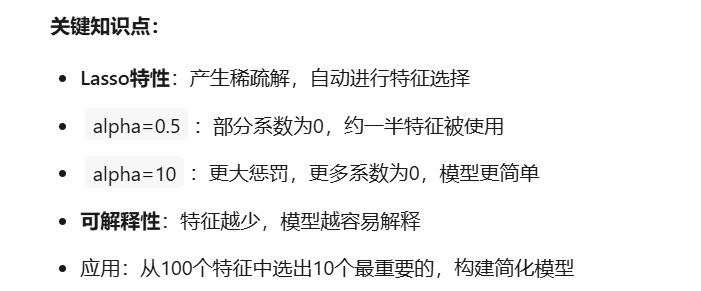

查看系数：

In [23]:
model.coef_

array([-0.11526463,  0.        , -0.        ,  0.39707879, -0.        ,
        2.97425861, -0.        , -0.17056942, -0.        , -0.        ,
       -1.59844856,  0.54313871, -3.66614361])

如果将α设置为一个更大的值，可以看到模型不会使用任何特征：

In [25]:
# 创建一个alpha值为10的套索回归
regression_al10 = Lasso(alpha=10)
model_al10 = regression_al10.fit(features_standardized, target)
model_al10.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])